In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from pandas.plotting import register_matplotlib_converters

from sklearn.linear_model import LinearRegression
from functions import *

In [2]:

#60의 배수로 넣을 것
days = 180
domestic_last_page_n = days//6
overseas_last_page_n = days//10

In [3]:
#국내 지표 긁어오기
domestic_prices=domesitc("KPI200", domestic_last_page_n)
# print(domestic_prices)
print(len(domestic_prices))


180


In [4]:
# 해외지수
overseas_code_list = ["SPI@SPX",'SHS@000001',"NII@NI225"]
overseas_index_list = ['s&p 500','shanghai','nikkei 225']

overseas_indices_dict=dict()
for i in range(3):
    overseas_indices_dict[overseas_code_list[i]] = overseas_index_list[i]

historical_indices = dict()
historical_rates = dict()

for code, index in overseas_indices_dict.items():
    print(index)
    historical_indices[index]=foreign(code,overseas_last_page_n)
    
print(len(historical_indices["s&p 500"]))

s&p 500
shanghai
nikkei 225
180


In [5]:
# 환율
exchange_rates=dict()

exchange_rate_key_list = ["USDKRW","JPYKRW","CNYKRW"]
exchange_rate_value_list = ["us_rates","jp_rates","ch_rates"]

total_keys = ["kospi200"]
total_keys.extend(overseas_index_list)
total_keys.extend(exchange_rate_value_list)

In [6]:


for i in range(3):
    exchange_rates[exchange_rate_value_list[i]]=exchange_rate_key_list[i]
    
print(exchange_rates)


{'us_rates': 'USDKRW', 'jp_rates': 'JPYKRW', 'ch_rates': 'CNYKRW'}


In [7]:
for values, nation_krw in exchange_rates.items():
	historical_rates[values]=exchange_rate(nation_krw,overseas_last_page_n)	
	
# print(historical_rates)
# print(len(historical_rates))
print(len(historical_rates["us_rates"]))

180


In [8]:
print(historical_indices.keys())

dict_keys(['s&p 500', 'shanghai', 'nikkei 225'])


In [19]:
total_dict = dict()
total_dict['kospi200']=domestic_prices
for i,index in enumerate(overseas_index_list):
    total_dict[index] = historical_indices[index]

for i,rate in enumerate(exchange_rate_value_list):
    total_dict[rate] = historical_rates[rate]

price_df=pd.DataFrame(total_dict)
price_df=price_df.sort_index(ascending=False)


print(price_df)



            kospi200  s&p 500  shanghai  nikkei 225  us_rates  jp_rates  \
2022-01-17    383.81      NaN   3541.67    28333.52    1192.5   1041.89   
2022-01-14    387.45  4662.85   3521.26    28124.28    1190.0   1041.89   
2022-01-13    393.00  4659.03   3555.26    28489.13    1185.5   1035.15   
2022-01-12    394.66  4726.35   3597.43    28765.66    1192.5   1032.78   
2022-01-11    388.97  4713.07   3567.44    28222.48    1194.0   1034.08   
...              ...      ...       ...         ...       ...       ...   
2021-04-27       NaN      NaN   3442.61    28991.89       NaN       NaN   
2021-04-26       NaN      NaN   3441.17    29126.23       NaN       NaN   
2021-04-23       NaN      NaN   3474.17    29020.63       NaN       NaN   
2021-04-22       NaN      NaN       NaN    29188.17       NaN       NaN   
2021-04-21       NaN      NaN       NaN    28508.55       NaN       NaN   

            ch_rates  
2022-01-17    187.74  
2022-01-14    187.21  
2022-01-13    186.29  
2022-01

In [26]:
price_df=price_df.ffill()
price_df=price_df.bfill()
price_df.to_csv("step1.csv")

print(price_df)


            kospi200  s&p 500  shanghai  nikkei 225  us_rates  jp_rates  \
2021-05-10    435.63  4188.43   3427.99    29518.34    1113.5   1023.96   
2021-05-11    428.77  4152.10   3441.85    28608.59    1119.0   1029.20   
2021-05-12    421.86  4063.04   3462.75    28147.51    1125.5   1035.47   
2021-05-13    416.07  4112.50   3429.54    27448.01    1133.5   1033.74   
2021-05-14    420.17  4173.85   3490.38    28084.47    1129.5   1032.78   
...              ...      ...       ...         ...       ...       ...   
2022-01-10    387.52  4670.29   3593.52    28478.56    1198.0   1036.56   
2022-01-11    388.97  4713.07   3567.44    28222.48    1194.0   1034.08   
2022-01-12    394.66  4726.35   3597.43    28765.66    1192.5   1032.78   
2022-01-13    393.00  4659.03   3555.26    28489.13    1185.5   1035.15   
2022-01-14    387.45  4662.85   3521.26    28124.28    1190.0   1041.89   

            ch_rates  
2021-05-10    173.79  
2021-05-11    174.24  
2021-05-12    174.73  
2021-05

In [27]:

# price_df=price_df.bfill()
price_df = price_df.dropna()
price_df=price_df[:days]

price_df=price_df.sort_index(ascending=True)

price_df.to_csv("total.csv")
print(price_df)


            kospi200  s&p 500  shanghai  nikkei 225  us_rates  jp_rates  \
2021-05-10    435.63  4188.43   3427.99    29518.34    1113.5   1023.96   
2021-05-11    428.77  4152.10   3441.85    28608.59    1119.0   1029.20   
2021-05-12    421.86  4063.04   3462.75    28147.51    1125.5   1035.47   
2021-05-13    416.07  4112.50   3429.54    27448.01    1133.5   1033.74   
2021-05-14    420.17  4173.85   3490.38    28084.47    1129.5   1032.78   
...              ...      ...       ...         ...       ...       ...   
2022-01-10    387.52  4670.29   3593.52    28478.56    1198.0   1036.56   
2022-01-11    388.97  4713.07   3567.44    28222.48    1194.0   1034.08   
2022-01-12    394.66  4726.35   3597.43    28765.66    1192.5   1032.78   
2022-01-13    393.00  4659.03   3555.26    28489.13    1185.5   1035.15   
2022-01-14    387.45  4662.85   3521.26    28124.28    1190.0   1041.89   

            ch_rates  
2021-05-10    173.79  
2021-05-11    174.24  
2021-05-12    174.73  
2021-05

90


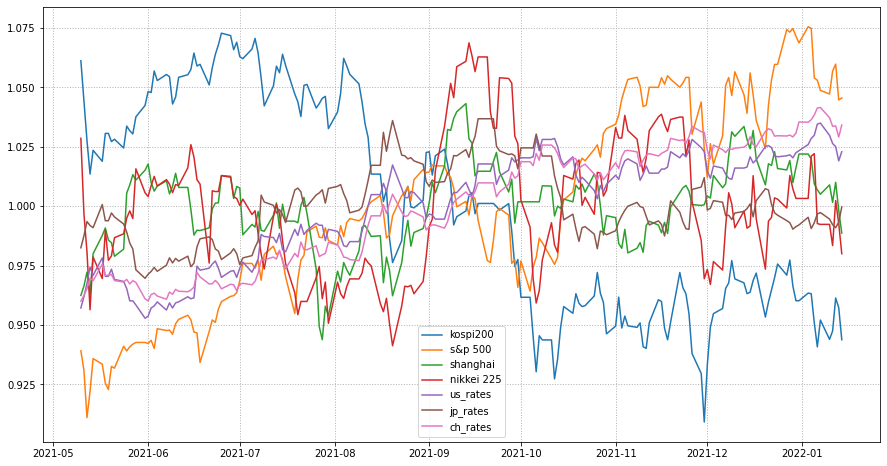

In [29]:
median_number = len(price_df)//2
print(median_number)

plt.figure(figsize=(15,8))

for index in total_keys:
    plt.plot(price_df[index]/price_df[index].mean(), label=index)
    
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

plt.show()


In [30]:

#두번째 수행과제 : 코스피지수 및 나머지 6개지수의 평균 분산 표준편차 중간값 최대값 최소값(요약통계)을 뽑음

for key in price_df:
    sum_v = price_df[key].sum()
    median=price_df[key].median()        
    mean=price_df[key].mean()        
    var=price_df[key].var()
    std=price_df[key].std()
    max=price_df[key].max()
    min=price_df[key].min()
    print(f"{key}의 합 : {sum_v:.0f}, \
평균 : {mean:.0f}, 분산 : {var:.0f}, 표준편차 : {std:.0f}, \
중간값 {median:.0f}: , 최대값 : {max:.0f}, 최소값 : {min:.0f}")




kospi200의 합 : 73895, 평균 : 411, 분산 : 327, 표준편차 : 18, 중간값 411: , 최대값 : 440, 최소값 : 373
s&p 500의 합 : 802781, 평균 : 4460, 분산 : 33393, 표준편차 : 183, 중간값 4448: , 최대값 : 4797, 최소값 : 4063
shanghai의 합 : 641108, 평균 : 3562, 분산 : 3913, 표준편차 : 63, 중간값 3568: , 최대값 : 3715, 최소값 : 3362
nikkei 225의 합 : 5165813, 평균 : 28699, 분산 : 626714, 표준편차 : 792, 중간값 28708: , 최대값 : 30670, 최소값 : 27013
us_rates의 합 : 209405, 평균 : 1163, 분산 : 676, 표준편차 : 26, 중간값 1171: , 최대값 : 1204, 최소값 : 1108
jp_rates의 합 : 187602, 평균 : 1042, 분산 : 264, 표준편차 : 16, 중간값 1039: , 최대값 : 1081, 최소값 : 1011
ch_rates의 합 : 32585, 평균 : 181, 분산 : 20, 표준편차 : 5, 중간값 182: , 최대값 : 189, 최소값 : 174


In [31]:
slopes=[]
intercepts=[]
for x_keys in total_keys[1:]:
    y=price_df['kospi200']/price_df['kospi200'].mean()
    x=price_df[x_keys]/price_df[x_keys].mean()

    independent_var=np.array(x).reshape(-1,1)
    dependent_var=np.array(y).reshape(-1,1)

    regr=LinearRegression()
    regr.fit(independent_var,dependent_var)

    result={"Slope":regr.coef_[0,0],"Intercept":regr.intercept_[0],"R^2":regr.score(independent_var,dependent_var)}
    print(x_keys)
    print(result)
    print("-"*50)
    slopes.append(regr.coef_[0,0])
    intercepts.append(regr.intercept_[0])

s&p 500
{'Slope': -0.7722069012178585, 'Intercept': 1.7722069012178585, 'R^2': 0.5155385233899717}
--------------------------------------------------
shanghai
{'Slope': -0.6075287738931181, 'Intercept': 1.607528773893118, 'R^2': 0.058623866440013606}
--------------------------------------------------
nikkei 225
{'Slope': -0.24419598100032494, 'Intercept': 1.244195981000325, 'R^2': 0.02336694402189121}
--------------------------------------------------
us_rates
{'Slope': -1.730869794752028, 'Intercept': 2.7308697947520284, 'R^2': 0.7707310179840159}
--------------------------------------------------
jp_rates
{'Slope': -0.8634714864963434, 'Intercept': 1.8634714864963433, 'R^2': 0.0931954251250886}
--------------------------------------------------
ch_rates
{'Slope': -1.6488359612440002, 'Intercept': 2.648835961244001, 'R^2': 0.8728028450052485}
--------------------------------------------------


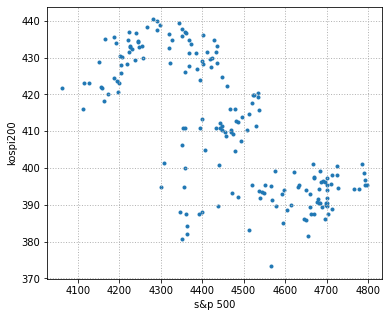

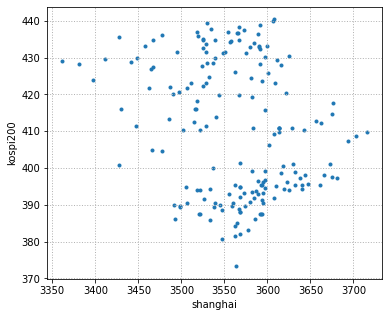

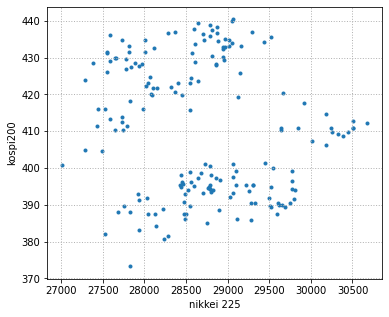

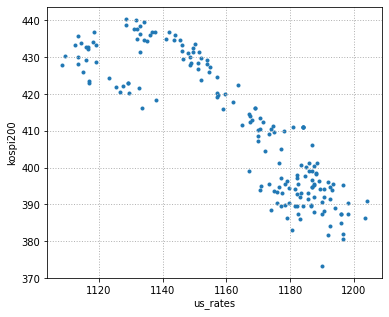

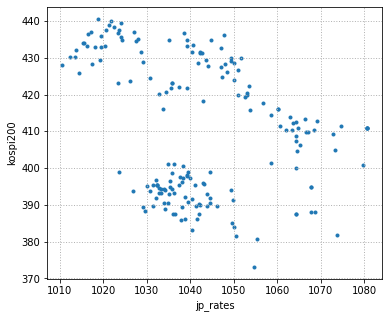

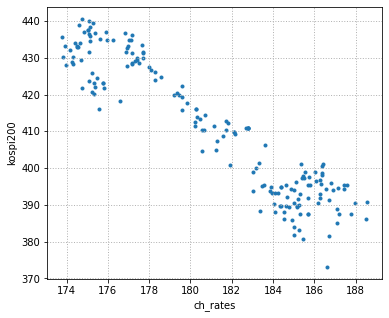

In [32]:
for x_keys in total_keys[1:]:
    y=price_df['kospi200']
    x=price_df[x_keys]

    plt.figure(figsize=(6,5))
    plt.scatter(x,y,marker=".")
    plt.grid(True, color='0.7', linestyle=':', linewidth=1)
    plt.ylabel("kospi200")
    plt.xlabel(x_keys)

    plt.show()

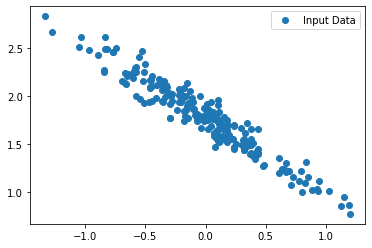

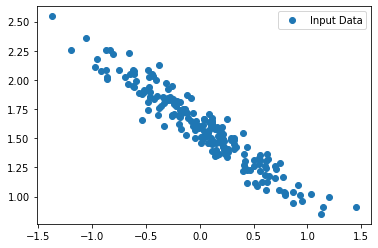

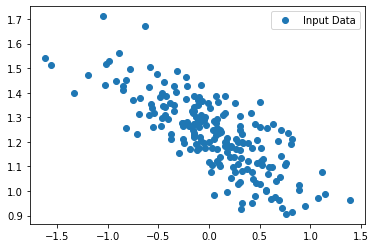

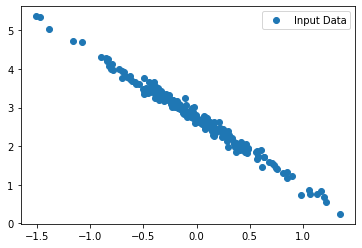

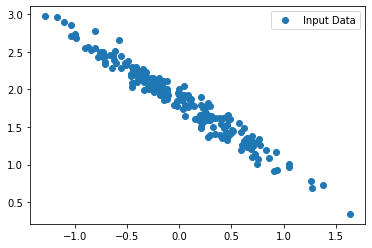

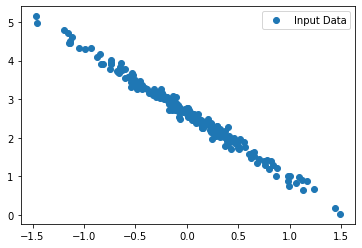

In [33]:

for a,b in zip(slopes,intercepts):
	number_of_points = 200
	x_point = []
	y_point = []
	for i in range(number_of_points):
		x = np.random.normal(0.0,0.5)
		y = a*x + b +np.random.normal(0.0,0.1)
		x_point.append([x])
		y_point.append([y])

	plt.plot(x_point,y_point, 'o', label='Input Data')
	plt.legend()
	plt.show()

#해당 값은 추후 torch로 수정(22/1/18)

# # A와 b를 tf.Variable로 정의하고 임의의 값을 할당
# A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
# # A는 -1에서 1사이의 임의의 값으로, b는 0으로 초기화
# B = tf.Variable(tf.zeros([1]))
# # y와 x의 선형 관계식 정의
# y = A * x_point + B
# # 비용함수(cost function) 정의: 예측값과 실제값의 차이 -> mean squared error (MSE)
# cost_function = tf.reduce_mean(tf.square(y - y_point))
# # tensorflow에서 경사하강법(gradient descent)을 이용하여 cost_function을 최소화
# optimizer = tf.train.GradientDescentOptimizer(0.5) # 0.5는 학습률(learning rate)
# train = optimizer.minimize(cost_function)
# # 변수 초기화
# model = tf.global_variables_initializer()
# # A와 b의 값을 도출할 수 있게 세션을 통해 모델 학습을 20회 반복하도록 설정
# with tf.Session() as session: # 모델 시뮬레이션을 수행
# 	session.run(model)
# 	for step in range(0,21):
# 		session.run(train) # 각 스텝마다 학습을 수행
# 		if (step % 5) == 0: # 매 5번째 스텝마다 점이 어떤 패턴인지 출력
# 			plt.plot(x_point, y_point, 'o',label='step = {}'.format(step))
# 			# 학습된 A와 b를 이용한 회귀직선 y=Ax+b 출력
# 			plt.plot(x_point, session.run(A) * x_point + session.run(B))
# 			plt.legend()
# 			plt.show()